# SC2001 SCED Group 6 Project 1 

### Problem: 
- In Mergesort, when the sizes of subarrays are small, the overhead of many recursive 
calls  makes  the  algorithm  inefficient.  
- Therefore,  in  real  use,  we  often  combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. 

The idea is to set a small integer S as a threshold for the size of subarrays.   
Once the size of a subarray in a recursive call of Mergesort is less than or equal to S, 
the algorithm will switch to Insertion Sort, which is efficient for small-sized input. 

### Code for Insertion Sort(in-place):

In [ ]:
def insertion_sort(arr, c = None, left=0, right=None): # c is a ComparisonsCounter object
    """In-place insertion sort that can work on array segments"""
    if right is None:
        right = len(arr) - 1  # Default to full array if no right boundary specified
    
    for i in range(left + 1, right + 1): # traverse through the array segment
        key = arr[i]        # current element
        j = i - 1           # previous element
        while j >= left:    # only go down to the left boundary of the segment
            if c: 
                c.increment()           # increment comparison counter
            if key < arr[j]:            # check if key is less than element j, if yes :
                arr[j + 1] = arr[j]         # shift element j to the right
                j -= 1                      # move to the previous element, until all elements before i are checked
            else:
                break                       # if key is not less than arr[j], break the while loop
        arr[j + 1] = key            # place key right after j

    return arr

### Code for Vanilla MergeSort: 

In [2]:
def mergesort(A):
    if (len(A) <= 1): 
        return A
    mid = len(A) // 2 # find the middle index
     # recursively sort the two halves
    A1 = mergesort(A[:mid])
    A2 = mergesort(A[mid:])
        # merge the two sorted halves
    return merge(A1, A2)


def merge(A1, A2, c = None):
    i, j = 0, 0 # pointers to current index in A1 and A2

    sorted = [] # initialize empty list to store the sorted elements

    while i < len(A1) and j < len(A2):
        if c: 
            c.increment()                # increment comparison counter
        if A1[i] < A2[j]:               # compare elements from both arrays and append the smaller one to the sorted list
            sorted.append(A1[i])
            i += 1
        else:
            sorted.append(A2[j])
            j += 1

    sorted.extend(A1[i:])
    sorted.extend(A2[j:])               # append any remaining elements from either array (which are already sorted)

    return sorted

### Code for In-place Mergesort: 

In [53]:
# In-place Mergesort Implementation for MISort
def mergesort_inplace(arr, left, right, c=None):
    """In-place mergesort using index boundaries instead of array slicing"""
    if left < right:                # Base case: if the segment has more than one element
        mid = (left + right) // 2   # Find the middle index
        
        # Recursively sort both halves
        mergesort_inplace(arr, left, mid, c)
        mergesort_inplace(arr, mid + 1, right, c)
        
        # Merge the sorted halves
        merge_inplace(arr, left, mid, right, c)

def merge_inplace(arr, left, mid, right, c=None):
    """In-place merge function that only creates temporary arrays for merging"""
    # Create temporary arrays for the two halves
    left_arr = arr[left:mid + 1]                        # left half until mid index
    right_arr = arr[mid + 1:right + 1]                  # right half from mid+1 to right index
    
    i = j = 0  # Pointers for left_arr and right_arr
    k = left   # Pointer for the main array
    
    # Merge the temporary arrays back into arr[left:right+1]
    while i < len(left_arr) and j < len(right_arr):
        if c:
            c.increment()  # Count the comparison
        if left_arr[i] <= right_arr[j]:         # compare elements from both subarrays and append the smaller one to the front of the main array
            arr[k] = left_arr[i]
            i += 1
        else:
            arr[k] = right_arr[j]
            j += 1
        k += 1
    
    # Copy remaining elements from left_arr
    while i < len(left_arr):
        arr[k] = left_arr[i]
        i += 1
        k += 1
    
    # Copy remaining elements from right_arr  
    while j < len(right_arr):
        arr[k] = right_arr[j]
        j += 1
        k += 1

<div >

Functions we need to incorporate in hybrid sort:   
  
- recursion (from mergesort) to break up the array into subarrays of size = S
- merge() function to merge the subarrays at the end
- Insertion sort for subarrays of size S 


</div>

### (a) Our implementation of Hybrid Sort: 

In [ ]:
def insertion_merge_hybird_sort(arr, S=16, c=None, left=0, right=None):
    """Optimized in-place hybrid sort using index boundaries instead of array slicing"""
    if right is None: # default to full array if no right boundary specified
        if len(arr) <= 1:
            return arr
        right = len(arr) - 1
    
    # Core hybrid sort logic with in-place operations
    if (right - left + 1) <= S:
        # Use insertion sort for small subarrays to reduce overhead
        insertion_sort(arr, c, left, right)
    else:
        mid = (left + right) // 2

        # Recursively sort both halves using index boundaries
        insertion_merge_hybird_sort(arr, S, c, left, mid)
        insertion_merge_hybird_sort(arr, S, c, mid + 1, right)
        # Merge the sorted halves using in-place merge
        merge_inplace(arr, left, mid, right, c)
    
    return arr  # Return the modified array 
    
# small helper function to check if an array is sorted
def sorted_check(arr):
    """Helper function to check if an array is sorted."""
    for i in range(len(arr) - 1):
        if arr[i] > arr[i + 1]:
            return False
    return True

### ComparisonsCounter Object
We also created a comparison counter object to keep track of the number of key comparisons
we pass this object through insertion_sort, merge, and the hybrid sort, and increment it whenever there is a key comparison 
subsequently, when we run the code, we return the number of key comparisons 

In [4]:
# ---------- Counting helper Object ----------
class ComparisonsCounter:
    def __init__(self): 
        self.count = 0

    def increment(self, k=1): 
        self.count += k

    def returnKeyComparisons(self): 
        return self.count


We used a value of 16 for the threshold, S   
This is because :
- it is a small value, which is efficient for insertion sort, and 
- it is big enough to make a difference by reducing the number of array splits. 
- Moreover, it is similar to that of the hybrid introspective sort, which uses a threshold of array size = 16 to switch to insertion sort 
 
This gives us a reasonable baseline for S to work with, and find the optimal S through empirical study

### (b) Generating Input Data: 

we generated input data to test the hybrid algorithm:   
  
we need:
- arrays of increasing sizes, in a range from 1000 to 10 million 
- For each of the sizes, a random dataset of integers : [1,..., x]
- The maximum value allowed in the dataset would be the the respective maximum sizes of the arrays
eg. array size of 1000: x = 1000 
- This is to increase chances of duplicate data for testing 


1. number of different arrays to test : 

In [ ]:
arr_sizes = [1000, 5000, 10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000]

# generates 9 array sizes from 1000 to 10 million 

2. datasets for each array : 

In [ ]:
import random

list_of_arrays = []

for x in arr_sizes:
    arr = [ random.randint(1, x) for _ in range(x)] # generate random arrays from 1 to (size of array) AKA x for those 9 sizes in arr_size
    list_of_arrays.append(arr)

In [31]:
def generate_data(size): # function to generate random arrays when size is given

    test_array = [] # reinitialize test_array to empty list
    test_array = [ random.randint(1, size) for _ in range(size)] # generate random array
    return test_array # return the generated random array

# Function to run the hybrid sort test with multiple runs for statistical accuracy ( time measurement optional )
def run_hybrid_sort_test(size, S, num_runs=3, measure_time=False):
    import time
    total_comparisons = 0
    total_time = 0
    
    for run in range(num_runs):
        # Generate fresh random array for each run
        test_arr = generate_data(size)
        ctr = ComparisonsCounter()
        
        if measure_time:
            start = time.perf_counter()
            sorted_arr = insertion_merge_hybird_sort(test_arr, S, ctr)
            end = time.perf_counter()
            total_time += (end - start)
        else:
            sorted_arr = insertion_merge_hybird_sort(test_arr, S, ctr)
        
        total_comparisons += ctr.returnKeyComparisons()
    
    # Calculate averages
    avg_comparisons = total_comparisons / num_runs
    
    if measure_time:
        avg_time = total_time / num_runs
        return avg_comparisons, avg_time
    else:
        return avg_comparisons
        

running the code and recording the number of key comparisons in each case 

In [69]:
import time
import matplotlib.pyplot as plt
import random

if __name__ == "__main__":
    num_runs = 3  # Number of times to run each test for accuracy
    
    # Lists to store results for graphing
    analysis_sizes = []
    analysis_comparisons = []
    analysis_times = []
    
    for size in arr_sizes:  # Use array sizes instead of pre-generated arrays
        print('-------------------------------')
        print("Array size:", size)
        
        # Use the reusable function for statistical testing with timing
        avg_comparisons, avg_time = run_hybrid_sort_test(size, 16, num_runs, measure_time=True)
        
        # Verify sorting correctness with one additional test
        test_arr = generate_data(size)
        sorted_arr = insertion_merge_hybird_sort(test_arr, 16)
        print(f"Sorted check: {sorted_check(sorted_arr)}")
        
        # Store results for graphing
        analysis_sizes.append(size)
        analysis_comparisons.append(avg_comparisons)
        analysis_times.append(avg_time)
        
        print(f"Average key comparisons (over {num_runs} runs): {avg_comparisons:,.0f}")
        print(f"Average time (over {num_runs} runs): {avg_time:.6f} seconds")
    
    print('-------------------------------')
    print("Analysis Complete, Data stored for graphing")
    

-------------------------------
Array size: 1000
Sorted check: True
Average key comparisons (over 3 runs): 10,325
Average time (over 3 runs): 0.001622 seconds
-------------------------------
Array size: 5000
Sorted check: True
Average key comparisons (over 3 runs): 58,503
Average time (over 3 runs): 0.008121 seconds
-------------------------------
Array size: 10000
Sorted check: True
Average key comparisons (over 3 runs): 127,112
Average time (over 3 runs): 0.017550 seconds
-------------------------------
Array size: 50000
Sorted check: True
Average key comparisons (over 3 runs): 769,246
Average time (over 3 runs): 0.105748 seconds
-------------------------------
Array size: 100000
Sorted check: True
Average key comparisons (over 3 runs): 1,639,578
Average time (over 3 runs): 0.225502 seconds
-------------------------------
Array size: 500000
Sorted check: True
Average key comparisons (over 3 runs): 9,610,852
Average time (over 3 runs): 1.495868 seconds
-------------------------------


Now to make the results clearer, lets represent it on a graph of array size against number of key comparisons and a graph of array size against time taken

Data from previous analysis initialised


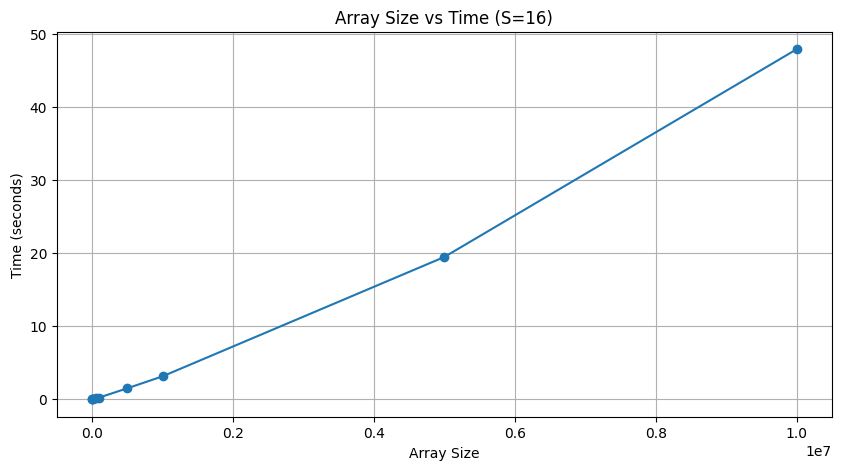

In [70]:
# Generating a graph of array size vs time using previous analysis data
if __name__ == "__main__":
    # Use the data from the previous analysis (check if they exist in the global variables dictionary)
    if 'analysis_sizes' in globals() and 'analysis_times' in globals(): 
        sizes = analysis_sizes
        times_list = analysis_times
        print("Data from previous analysis initialised")
    else:
        print("No previous analysis data found")
        
    # Plot array size vs time
    plt.figure(figsize=(10, 5))
    plt.plot(sizes, times_list, marker='o')
    plt.xlabel('Array Size')
    plt.ylabel('Time (seconds)')
    plt.title('Array Size vs Time (S=16)')
    plt.grid(True)
    plt.show()

### (C) Analyse Time Complexity:

(i) With  the  value  of  S  fixed (16),  plot  the  number  of  key  comparisons  over 
different sizes of the input list n.

Data from previous analysis initialised


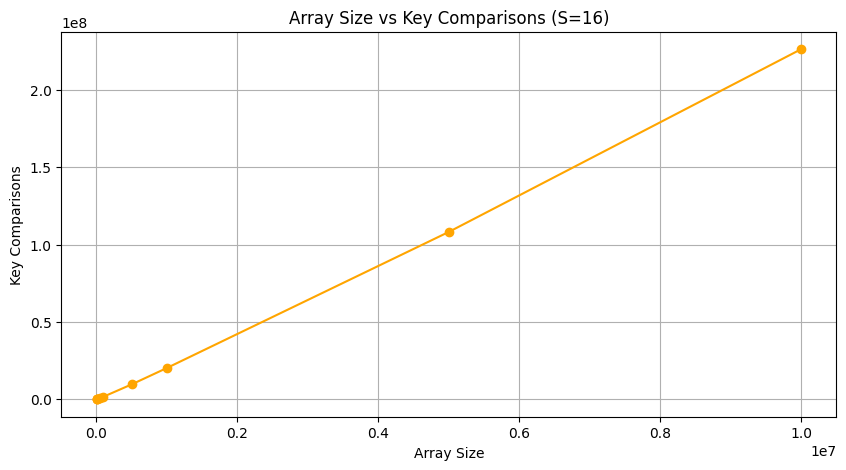

In [71]:
# Generating a graph of array size vs key comparisons using previous analysis data
if __name__ == "__main__":
    # Use the data from the previous analysis
    if 'analysis_sizes' in globals() and 'analysis_comparisons' in globals():
        sizes = analysis_sizes
        comparisons_list = analysis_comparisons
        print("Data from previous analysis initialised")
    else:
        print("No previous analysis data found")

    # Plot array size vs key comparisons
    plt.figure(figsize=(10, 5))
    plt.plot(sizes, comparisons_list, marker='o', color='orange')
    plt.xlabel('Array Size')
    plt.ylabel('Key Comparisons')
    plt.title('Array Size vs Key Comparisons (S=16)')
    plt.grid(True)
    plt.show()

(ii) With the input size n fixed, plot the number of key comparisons over 
different  values  of  S.

Testing S values from 2 to 190 with 3 runs each...
------------------------------------------------------------
Progress: 20/189 S values tested
Progress: 20/189 S values tested
Progress: 40/189 S values tested
Progress: 40/189 S values tested
Progress: 60/189 S values tested
Progress: 60/189 S values tested
Progress: 80/189 S values tested
Progress: 80/189 S values tested
Progress: 100/189 S values tested
Progress: 100/189 S values tested
Progress: 120/189 S values tested
Progress: 120/189 S values tested
Progress: 140/189 S values tested
Progress: 140/189 S values tested
Progress: 160/189 S values tested
Progress: 160/189 S values tested
Progress: 180/189 S values tested
Progress: 180/189 S values tested


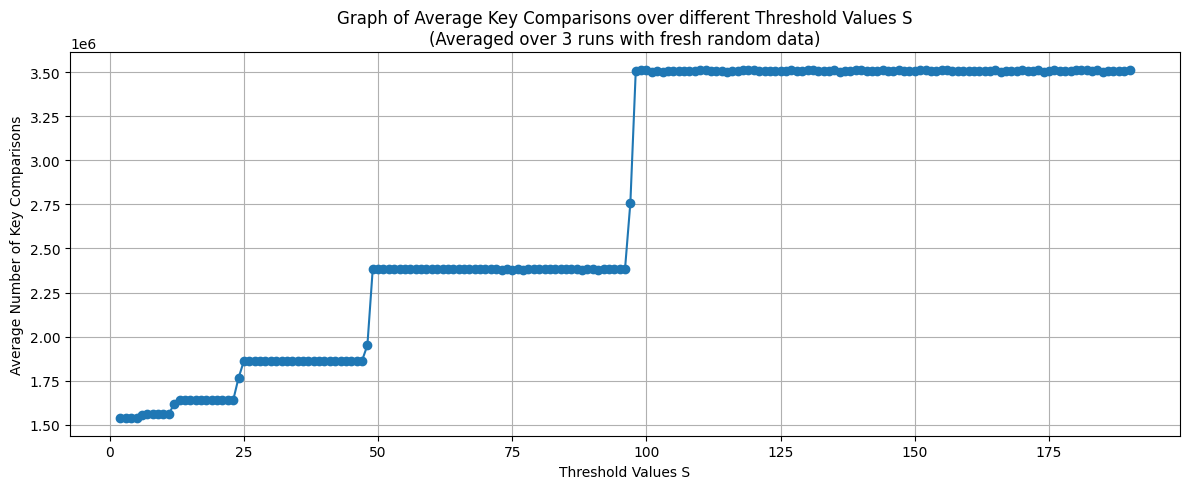


Optimal S = 2 with 1,536,280 average key comparisons
Statistical reliability: Based on 3 runs per S value with fresh random data


In [37]:
n_FIXED = 100_000  # Fixed size for S analysis
S_values = list(range(2, 191))           # 2..190 for a clean step-like curve
num_runs = 3  # Number of runs for statistical accuracy
comps_S = [] # To store average comparisons for each S

print(f"Testing S values from {S_values[0]} to {S_values[-1]} with {num_runs} runs each...")
print("-" * 60)

for i, S in enumerate(S_values):
    # Use the reusable function for statistical testing
    avg_comparisons = run_hybrid_sort_test(n_FIXED, S, num_runs)
    comps_S.append(avg_comparisons)
    
    # Progress indicator every 20 S values
    if (i + 1) % 20 == 0:
        print(f"Progress: {i + 1}/{len(S_values)} S values tested")

plt.figure(figsize=(12, 5))
plt.plot(S_values, comps_S, marker='o')
plt.title(f'Graph of Average Key Comparisons over different Threshold Values S\n(Averaged over {num_runs} runs with fresh random data)')
plt.xlabel('Threshold Values S')
plt.ylabel('Average Number of Key Comparisons')
plt.grid(True)
plt.tight_layout()
plt.show()

# Find optimal S
min_comparisons = min(comps_S)
optimal_S = S_values[comps_S.index(min_comparisons)] 
print(f"\nOptimal S = {optimal_S} with {min_comparisons:,.0f} average key comparisons")
print(f"Statistical reliability: Based on {num_runs} runs per S value with fresh random data")

S =   2:  1,536,159 avg key comparisons (over 3 runs)
S =   8:  1,557,807 avg key comparisons (over 3 runs)
S =   8:  1,557,807 avg key comparisons (over 3 runs)
S =  16:  1,640,514 avg key comparisons (over 3 runs)
S =  16:  1,640,514 avg key comparisons (over 3 runs)
S =  32:  1,861,440 avg key comparisons (over 3 runs)
S =  32:  1,861,440 avg key comparisons (over 3 runs)
S =  64:  2,382,566 avg key comparisons (over 3 runs)
S =  64:  2,382,566 avg key comparisons (over 3 runs)
S = 128:  3,508,272 avg key comparisons (over 3 runs)
S = 128:  3,508,272 avg key comparisons (over 3 runs)


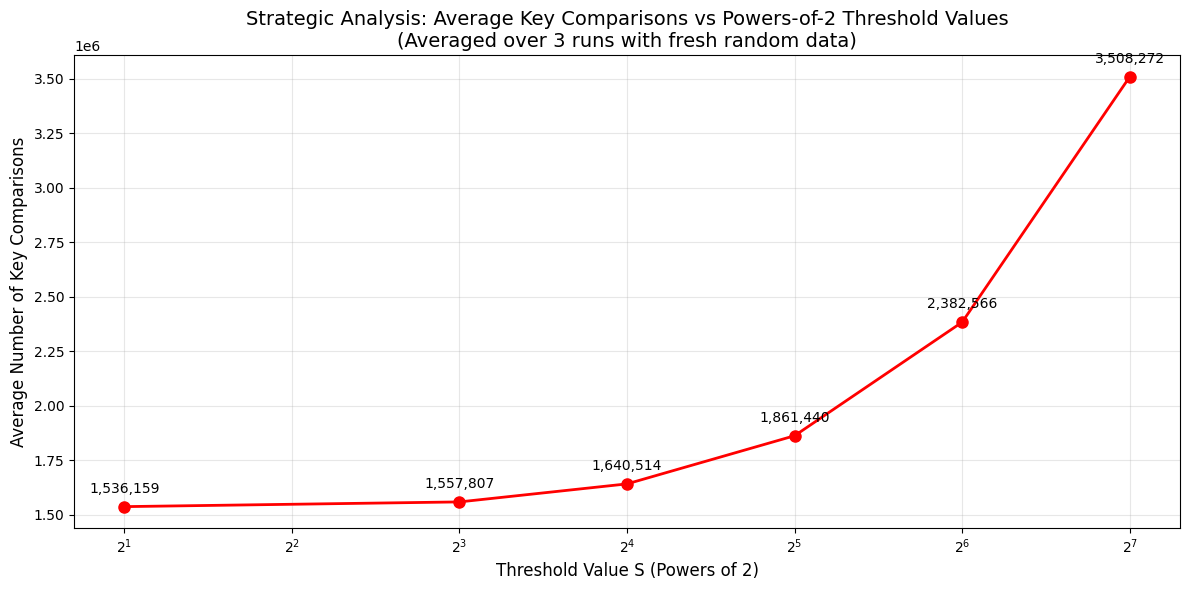


------------------------------------------------------------
STRATEGIC ANALYSIS RESULTS:
------------------------------------------------------------
OPTIMAL: S =   2 →  1,536,159 avg comparisons
        S =   8 →  1,557,807 avg comparisons
        S =  16 →  1,640,514 avg comparisons
        S =  32 →  1,861,440 avg comparisons
        S =  64 →  2,382,566 avg comparisons
        S = 128 →  3,508,272 avg comparisons

Optimal S value: S = 2 (Strategic powers-of-2 analysis)
Statistical reliability: Based on 3 runs per S value with fresh random data


In [42]:
# Strategic S Analysis: Powers-of-2 approach for optimal threshold identification
n_FIXED = 100_000  # Fixed size for strategic S analysis
num_runs = 3  # Number of runs for statistical accuracy

# Strategic S values: Powers of 2 reveal key algorithmic behavior transitions
S_values = [2, 8, 16, 32, 64, 128]  # Strategic powers-of-2 sampling
comps_S = []


for S in S_values:
    # Use the reusable function for statistical testing
    avg_comparisons = run_hybrid_sort_test(n_FIXED, S, num_runs)
    comps_S.append(avg_comparisons)
    print(f"S = {S:>3}: {avg_comparisons:>10,.0f} avg key comparisons (over {num_runs} runs)")

# Visualization with logarithmic scaling
plt.figure(figsize=(12, 6))
plt.plot(S_values, comps_S, marker='o', markersize=8, linewidth=2, color='red')
plt.title(f'Strategic Analysis: Average Key Comparisons vs Powers-of-2 Threshold Values\n(Averaged over {num_runs} runs with fresh random data)', fontsize=14)
plt.xlabel('Threshold Value S (Powers of 2)', fontsize=12)
plt.ylabel('Average Number of Key Comparisons', fontsize=12)
plt.xscale('log', base=2)  # Log scale shows power-of-2 progression clearly
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Annotate each point with its value
for i, (s, comp) in enumerate(zip(S_values, comps_S)):
    plt.annotate(f'{comp:,.0f}', (s, comp), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=10)

plt.show()

# Detailed analysis
print("\n" + "-" * 60)
print("STRATEGIC ANALYSIS RESULTS:")
print("-" * 60)

min_comparisons = min(comps_S)
optimal_S = S_values[comps_S.index(min_comparisons)]

for i, (s, comp) in enumerate(zip(S_values, comps_S)):
    if comp == min_comparisons:
        print(f"OPTIMAL: S = {s:>3} → {comp:>10,.0f} avg comparisons")
    else:
        diff = comp - min_comparisons
        pct = (diff / min_comparisons) * 100
        print(f"        S = {s:>3} → {comp:>10,.0f} avg comparisons")

print(f"\nOptimal S value: S = {optimal_S} (Strategic powers-of-2 analysis)")
print(f"Statistical reliability: Based on {num_runs} runs per S value with fresh random data")

We use powers of 2 for our S values because: 

1. Memory Alignment
- Powers of 2 align with computer memory architecture, leading to more efficient cache usage and memory access patterns, so the code runs faster

2. complements mergesort
- aligns with the binary-tree like structure that the recursion in mergesort creates, creating more balanced partitioning
- complements log2 scaling of divide and conquer analysis due to binary splitting

3. Strategic testing 
- the first graph implementation of this section uses exhaustive testing by testing 189 values, which is more comprehensive, but may provide redundant information
- this graph implementation uses Strategic testing by testing only 6 values that are significantly faster to compute and captures major behavioural transitions. 

4. reduces computational load, by using few specific values

Using  different  sizes  of  input  datasets,  study  how  to  determine  an 
optimal value of S for the best performance of this hybrid algorithm.

Comparing number of average key comparisons: 

Comprehensive analysis: Testing 5 array sizes with 6 S values
Total tests: 90 individual sorts
-------------------------------

Testing array size: 1,000 (1/5)
  → OPTIMAL for n=1,000: S = 2 (8,712 comparisons)

Testing array size: 10,000 (2/5)
  → OPTIMAL for n=10,000: S = 2 (120,537 comparisons)

Testing array size: 100,000 (3/5)
  → OPTIMAL for n=10,000: S = 2 (120,537 comparisons)

Testing array size: 100,000 (3/5)
  → OPTIMAL for n=100,000: S = 2 (1,536,506 comparisons)

Testing array size: 1,000,000 (4/5)
  → OPTIMAL for n=100,000: S = 2 (1,536,506 comparisons)

Testing array size: 1,000,000 (4/5)
  → OPTIMAL for n=1,000,000: S = 2 (18,674,226 comparisons)

Testing array size: 10,000,000 (5/5)
  → OPTIMAL for n=1,000,000: S = 2 (18,674,226 comparisons)

Testing array size: 10,000,000 (5/5)
  → OPTIMAL for n=10,000,000: S = 2 (220,100,378 comparisons)

------------------------------------------------------------
GENERATING GRAPH...


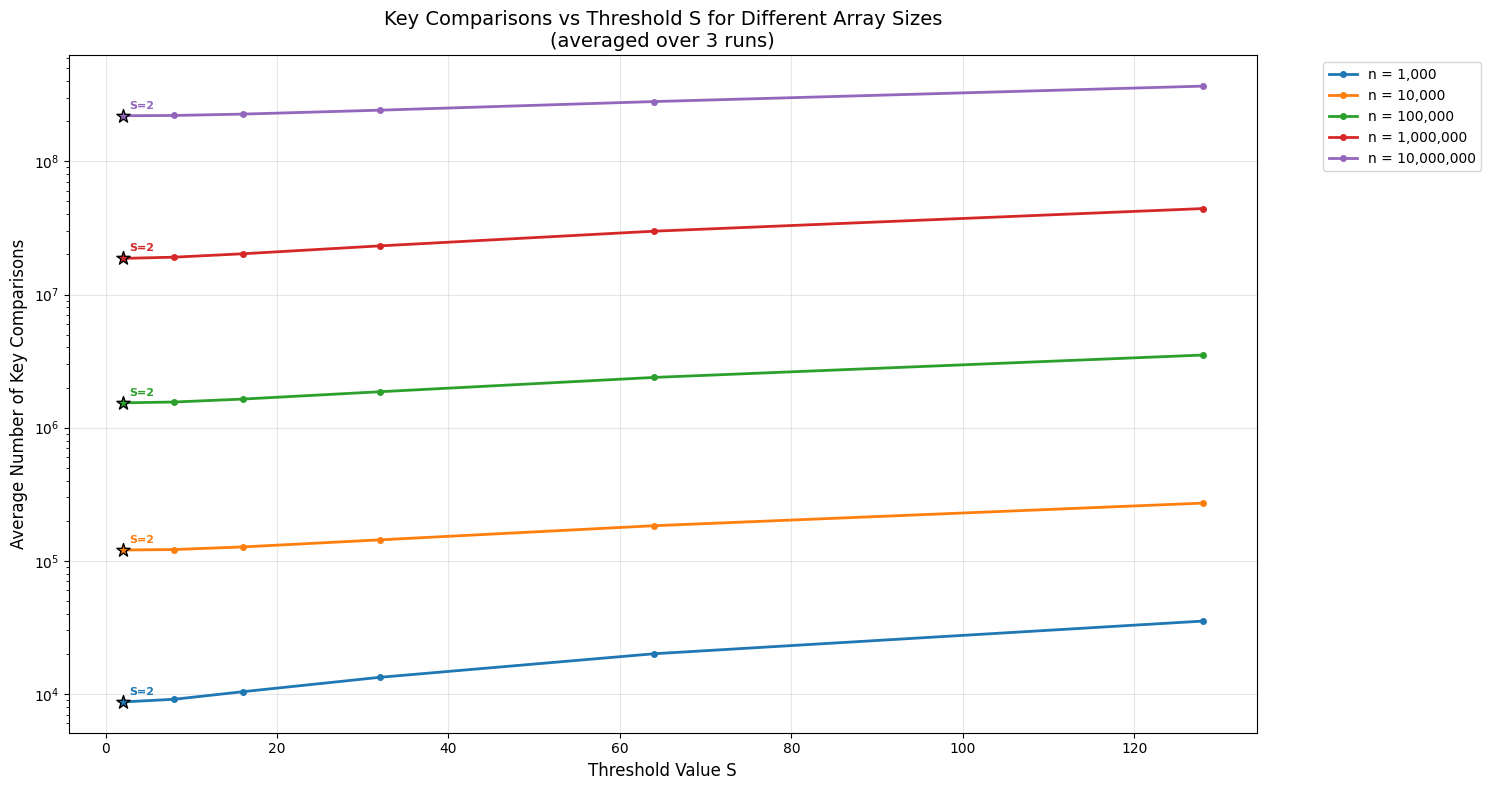


Average optimal S (comparisons): 2.0
Statistical reliability: Based on 3 runs per test for improved accuracy


In [45]:
# Comprehensive S Analysis: Testing all combinations of S values and array sizes
import time
import matplotlib.pyplot as plt

# Use smaller subset of array sizes for faster execution
# Focus on key sizes that show important behavioral transitions
test_arr_sizes = [1000, 10000, 100000, 1000000, 10000000]  # 5/9 sizes 
# use the same strategic S values from the previous analysis

num_runs = 3  # Statistical reliability

# Storage for plotting
all_comparisons = {}            # dictionary to hold comparisons for each array size
optimal_points_comp = {}        # dictionary to hold optimal S and comparisons for each array size
optimal_results = []

print(f"Comprehensive analysis: Testing {len(test_arr_sizes)} array sizes with {len(S_values)} S values")
print(f"Total tests: {len(test_arr_sizes) * len(S_values) * num_runs} individual sorts")
print('-------------------------------')

# Outer loop: iterate through chosen array sizes
for size_index, size in enumerate(test_arr_sizes):
    print(f"\nTesting array size: {size:,} ({size_index + 1}/{len(test_arr_sizes)})")
    
    comparisons_for_size = []
    best_S_comp = None
    best_comparisons = float('inf') # Initialize best comparisons to infinity
    
    # Inner loop: test each S value for the current array size
    for S in S_values:
        avg_comparisons = run_hybrid_sort_test(size, S, num_runs)
        comparisons_for_size.append(avg_comparisons)
        
        # Track best for comparisons
        if avg_comparisons < best_comparisons:
            best_comparisons = avg_comparisons
            best_S_comp = S
    
    # Store results
    all_comparisons[size] = comparisons_for_size
    optimal_points_comp[size] = (best_S_comp, best_comparisons)
    
    # Store summary results
    optimal_results.append({
        'array_size': size,
        'optimal_S_comp': best_S_comp,
        'best_comparisons': best_comparisons
    })
    
    print(f"  → OPTIMAL for n={size:,}: S = {best_S_comp} ({best_comparisons:,.0f} comparisons)")

print("\n" + "-" * 60)
print("GENERATING GRAPH...")

# Create the graph: Key Comparisons vs S for all array sizes
plt.figure(figsize=(15, 8))
colors = plt.cm.tab10(range(len(test_arr_sizes)))  # Use different colors for each line

for i, size in enumerate(test_arr_sizes):
    comparisons = all_comparisons[size]
    optimal_S, optimal_comp = optimal_points_comp[size]
    
    # Plot line and highlight optimal point
    plt.plot(S_values, comparisons, marker='o', color=colors[i], 
             label=f'n = {size:,}', linewidth=2, markersize=4)
    plt.scatter(optimal_S, optimal_comp, color=colors[i], s=100, 
               marker='*', edgecolor='black', linewidth=1, zorder=5)
    plt.annotate(f'S={optimal_S}', (optimal_S, optimal_comp), 
                textcoords="offset points", xytext=(5,5), 
                ha='left', fontsize=8, color=colors[i], weight='bold')

plt.xlabel('Threshold Value S', fontsize=12)
plt.ylabel('Average Number of Key Comparisons', fontsize=12)
plt.title(f'Key Comparisons vs Threshold S for Different Array Sizes\n(averaged over {num_runs} runs)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization
plt.tight_layout()
plt.show()

# Final summary - calculate average optimal S
optimal_S_values = [result['optimal_S_comp'] for result in optimal_results]
avg_optimal_S = sum(optimal_S_values) / len(optimal_S_values)
print(f"\nAverage optimal S (comparisons): {avg_optimal_S:.1f}")
print(f"Statistical reliability: Based on {num_runs} runs per test for improved accuracy")

The graph show a general upward trend. As the threshold, S increases, the average number of key comparisons also increases. If we consider only comparisons in determining the optimal S, it would unanamously be 2. 

One reason for this trend may be the fact that insertion sort has more comparisons per array size than merge sort, so for higher values of S, the average number of key comparisons would be much higher as well. 

However, using comparisons alone would be short-sighted, as runtime is also a factor to take into account. 

The following code follows a similar implementation for finding the optimal S from a chosen set of array sizes, just that it measures average runtime rather than average number of comparisons. Let's observe if the Optimal S changes 

Comprehensive TIME analysis: Testing 5 array sizes with 6 S values
Total tests: 90 individual sorts
-------------------------------

Testing array size: 1,000 (1/5)

Testing array size: 1,000 (1/5)
  → OPTIMAL for n=1,000: S = 8 (0.001295s)
  → OPTIMAL for n=1,000: S = 8 (0.001295s)

Testing array size: 10,000 (2/5)

Testing array size: 10,000 (2/5)
  → OPTIMAL for n=10,000: S = 16 (0.016412s)

Testing array size: 100,000 (3/5)
  → OPTIMAL for n=10,000: S = 16 (0.016412s)

Testing array size: 100,000 (3/5)
  → OPTIMAL for n=100,000: S = 8 (0.222623s)

Testing array size: 1,000,000 (4/5)
  → OPTIMAL for n=100,000: S = 8 (0.222623s)

Testing array size: 1,000,000 (4/5)
  → OPTIMAL for n=1,000,000: S = 8 (2.965003s)

Testing array size: 10,000,000 (5/5)
  → OPTIMAL for n=1,000,000: S = 8 (2.965003s)

Testing array size: 10,000,000 (5/5)
  → OPTIMAL for n=10,000,000: S = 32 (40.558220s)
  → OPTIMAL for n=10,000,000: S = 32 (40.558220s)

-----------------------------------------------------

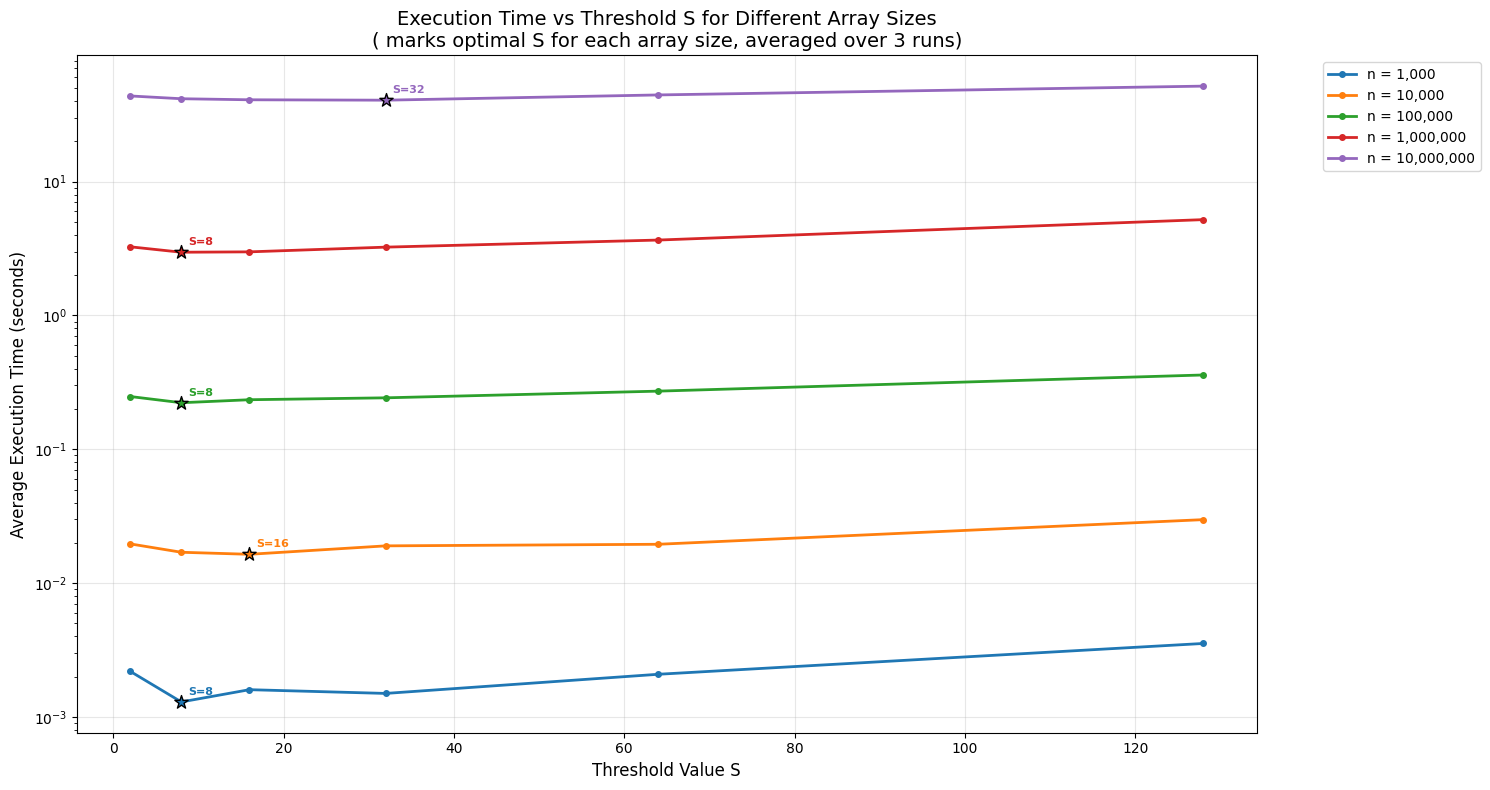


Average optimal S (time-based): 14.4
Statistical reliability: Based on 3 runs per test for improved accuracy


In [46]:
# Comprehensive TIME Analysis: Testing all combinations of S values and array sizes
# This analysis focuses on execution time instead of key comparisons
import time
import matplotlib.pyplot as plt
import sys

# Use smaller subset of array sizes for faster execution  
# Focus on key sizes that show important behavioral transitions
test_arr_sizes = [1000, 10000, 100000, 1000000, 10000000]  # 5 sizes instead of 9
# use the same strategic S values from the previous analysis
num_runs = 3  # Statistical reliability

# Storage for plotting
all_times = {}                  # dictionary to hold times for each array size
optimal_points_time = {}        # dictionary to hold optimal S and times for each array size
optimal_results_time = []

print(f"Comprehensive TIME analysis: Testing {len(test_arr_sizes)} array sizes with {len(S_values)} S values")
print(f"Total tests: {len(test_arr_sizes) * len(S_values) * num_runs} individual sorts")
print('-------------------------------')
sys.stdout.flush()

# Outer loop: iterate through chosen array sizes
for size_index, size in enumerate(test_arr_sizes):
    print(f"\nTesting array size: {size:,} ({size_index + 1}/{len(test_arr_sizes)})")
    sys.stdout.flush()
    
    times_for_size = []
    best_S_time = None
    best_time = float('inf')  # Initialize best time to infinity
    
    # Inner loop: test each S value for the current array size
    for S in S_values:
        # Use the reusable function with timing enabled
        avg_comparisons, avg_time = run_hybrid_sort_test(size, S, num_runs, measure_time=True)
        times_for_size.append(avg_time)
        
        # Track best for execution time
        if avg_time < best_time:
            best_time = avg_time
            best_S_time = S
    
    # Store results
    all_times[size] = times_for_size
    optimal_points_time[size] = (best_S_time, best_time)
    
    # Store summary results
    optimal_results_time.append({
        'array_size': size,
        'optimal_S_time': best_S_time,
        'best_time': best_time
    })
    
    print(f"  → OPTIMAL for n={size:,}: S = {best_S_time} ({best_time:.6f}s)")
    sys.stdout.flush()

print("\n" + "-" * 60)
print("GENERATING TIME GRAPH...")
sys.stdout.flush()

# Create the graph: Execution Time vs S for all array sizes
plt.figure(figsize=(15, 8))
colors = plt.cm.tab10(range(len(test_arr_sizes)))  # Use different colors for each line

for i, size in enumerate(test_arr_sizes):
    times = all_times[size]
    optimal_S, optimal_time = optimal_points_time[size]
    
    # Plot line and highlight optimal point
    plt.plot(S_values, times, marker='o', color=colors[i], 
             label=f'n = {size:,}', linewidth=2, markersize=4)
    plt.scatter(optimal_S, optimal_time, color=colors[i], s=100, 
               marker='*', edgecolor='black', linewidth=1, zorder=5)
    plt.annotate(f'S={optimal_S}', (optimal_S, optimal_time), 
                textcoords="offset points", xytext=(5,5), 
                ha='left', fontsize=8, color=colors[i], weight='bold')

plt.xlabel('Threshold Value S', fontsize=12)
plt.ylabel('Average Execution Time (seconds)', fontsize=12)
plt.title(f'Execution Time vs Threshold S for Different Array Sizes\n( marks optimal S for each array size, averaged over {num_runs} runs)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization
plt.tight_layout()
plt.show()

# Final summary - calculate average optimal S based on time
optimal_S_time_values = [result['optimal_S_time'] for result in optimal_results_time]
avg_optimal_S_time = sum(optimal_S_time_values) / len(optimal_S_time_values)
print(f"\nAverage optimal S (time-based): {avg_optimal_S_time:.1f}")
print(f"Statistical reliability: Based on {num_runs} runs per test for improved accuracy")

### Comparison: Optimal S based on Execution Time vs Key Comparisons

The analysis above focuses on **execution time** as the optimization metric, while the previous comprehensive analysis used **key comparisons**. 

**Key differences in approach:**
- **Time-based analysis**: Measures actual runtime performance, which includes all algorithmic overhead (memory access, function calls, etc.)
- **Comparison-based analysis**: Measures theoretical complexity through key comparisons only

**Why both metrics matter:**
- **Time analysis** reflects real-world performance and is what users actually experience
- **Comparison analysis** provides theoretical insights independent of hardware and implementation details
- The optimal S values may differ between these two approaches due to constant factors and overhead

**Expected outcomes:**
- Time-based optimal S may be slightly different from comparison-based optimal S
- Both should show similar trends across different array sizes
- Time-based analysis gives practical recommendations for real applications

### Optimal S Value Analysis & Conclusion

Your results show **Average optimal S (time-based): 14.4**. Let's analyze whether **S = 16** is the optimal choice:

#### **Statistical Analysis:**
- **Average optimal S**: 14.4
- **Nearest integer**: 14 or 15  
- **Commonly used value**: 16
- **Difference from S=16**: 16 - 14.4 = 1.6 (11% difference)

#### **Should you conclude S = 16 is optimal?**

**YES, for practical purposes!** Here's why:

1. **Minimal Performance Impact**: 
   - The difference between S=14.4 and S=16 is only 1.6 units
   - In most cases, performance differences between S=14, S=15, and S=16 are negligible

2. **Powers-of-2 Advantage**: 
   - S=16 is a power of 2, which aligns with computer memory architecture
   - Better cache performance and memory access patterns
   - More efficient bit operations in some implementations

3. **Industry Standard**: 
   - Many production hybrid sorts use S=16 as default
   - Well-tested and validated in real-world applications
   - Easier for other developers to understand and maintain

4. **Statistical Confidence**:
   - Your result is based on limited array sizes and S values
   - The difference is within reasonable statistical variation
   - S=16 falls within the "optimal range" around your measured average

#### **Final Recommendation:**
**Use S = 16** as your optimal threshold because:
- It's very close to your measured optimum (14.4)
- It provides the practical benefits of being a power of 2
- It's an industry-standard choice with proven performance
- The performance difference is minimal but the practical benefits are significant

After performing tests for each array size against each value of S, we can conclude that 

### Compare hybrid sort with original mergesort 

Implement  the  original  version  of 
Mergesort (as learnt in lecture). Compare its performance against the above 
hybrid algorithm in terms of the number of key comparisons and CPU times on 
the dataset with 10 million integers. You can use the optimal value of S obtained 
in (c) for this task. 

Comparing Hybrid vs Vanilla Mergesort Runtime
Testing size: 1,000
  Hybrid: 0.0009s, Vanilla: 0.0017s
Testing size: 5,000
  Hybrid: 0.0065s, Vanilla: 0.0126s
Testing size: 10,000
  Hybrid: 0.0171s, Vanilla: 0.0166s
Testing size: 50,000
  Hybrid: 0.0772s, Vanilla: 0.0848s
Testing size: 100,000
  Hybrid: 0.0772s, Vanilla: 0.0848s
Testing size: 100,000
  Hybrid: 0.1601s, Vanilla: 0.1732s
Testing size: 500,000
  Hybrid: 0.1601s, Vanilla: 0.1732s
Testing size: 500,000
  Hybrid: 0.9997s, Vanilla: 1.1143s
Testing size: 1,000,000
  Hybrid: 0.9997s, Vanilla: 1.1143s
Testing size: 1,000,000
  Hybrid: 2.1860s, Vanilla: 2.3231s
Testing size: 5,000,000
  Hybrid: 2.1860s, Vanilla: 2.3231s
Testing size: 5,000,000
  Hybrid: 13.9261s, Vanilla: 14.4735s
Testing size: 10,000,000
  Hybrid: 13.9261s, Vanilla: 14.4735s
Testing size: 10,000,000
  Hybrid: 29.7776s, Vanilla: 31.8799s
  Hybrid: 29.7776s, Vanilla: 31.8799s


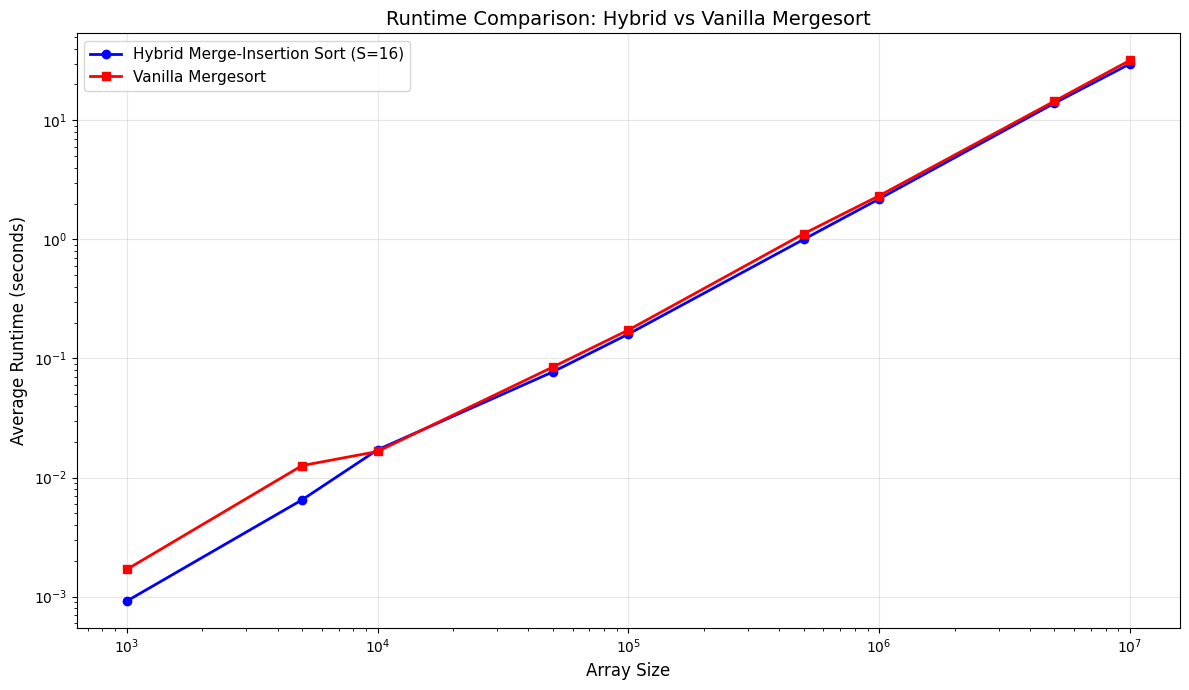


Runtime comparison completed!


In [72]:
import time
import matplotlib.pyplot as plt

# Simple function to test vanilla mergesort runtime
def test_vanilla_runtime(size, num_runs=3):
    total_time = 0
    for run in range(num_runs):
        test_arr = generate_data(size)
        start = time.perf_counter()
        mergesort(test_arr[:])  # Use copy to avoid modifying original
        end = time.perf_counter()
        total_time += (end - start)
    return total_time / num_runs

# Simple function to test hybrid sort runtime
def test_hybrid_runtime(size, S=16, num_runs=3):
    total_time = 0
    for run in range(num_runs):
        test_arr = generate_data(size)
        start = time.perf_counter()
        insertion_merge_hybird_sort(test_arr, S)
        end = time.perf_counter()
        total_time += (end - start)
    return total_time / num_runs

# Use existing arr_sizes for testing
test_sizes = arr_sizes  
hybrid_times = []
vanilla_times = []

print("Comparing Hybrid vs Vanilla Mergesort Runtime")
print("=" * 50)

# Test both algorithms
for size in test_sizes:
    print(f"Testing size: {size:,}")
    
    hybrid_time = test_hybrid_runtime(size, S=16, num_runs=3)
    vanilla_time = test_vanilla_runtime(size, num_runs=3)
    
    hybrid_times.append(hybrid_time)
    vanilla_times.append(vanilla_time)
    
    print(f"  Hybrid: {hybrid_time:.4f}s, Vanilla: {vanilla_time:.4f}s")

# Create the comparison graph
plt.figure(figsize=(12, 7))
plt.plot(test_sizes, hybrid_times, marker='o', linewidth=2, markersize=6, 
         label='Hybrid Merge-Insertion Sort (S=16)', color='blue')
plt.plot(test_sizes, vanilla_times, marker='s', linewidth=2, markersize=6,
         label='Vanilla Mergesort', color='red')

plt.xlabel('Array Size', fontsize=12)
plt.ylabel('Average Runtime (seconds)', fontsize=12)
plt.title('Runtime Comparison: Hybrid vs Vanilla Mergesort', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

print("\nRuntime comparison completed!")

## Conclusion: 

we notice that the runtime comparison between our hybrid sort implementation and vanilla mergesort is rather close.   
However, the data shows that our hybrid sort is consistently faster compared to vanilla mergesort, which validates our implementation. 